In [2]:
p = [0.1,0.2,0.3,0.4,0.5]
K = [9,10,11,12,13,14,15,16,17,18,19,20,21]

cartesianProduct = [f"{a}_{b}"  for a in p for b in K]
prova = str(cartesianProduct[0])
prova.split("_")

['0.1', '9']

In [3]:
# Cleaning the CSV File
import pandas as pd

VTM = pd.read_csv("FME_Exponential.csv").fillna(0)

mask1 = VTM["type"] == "scalar"
mask2 = VTM["attrname"] == "iterationvarsd"
VTM1 = VTM[mask1]
VTM2 = VTM[mask2]
VTM = pd.concat([VTM1, VTM2])

VTM.to_csv("FME_Exponential_cleaned.csv", index=False)


C:\Users\giova\AppData\Local\Temp\ipykernel_1760\761889886.py:4: DtypeWarning: Columns (2,3,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("FME_Exponential.csv").fillna(0)


In [81]:

df = pd.DataFrame(columns=["G"])

df.loc[1] = 2

df.head()

,G
1,2


In [78]:
import pandas as pd

df = pd.DataFrame(columns=['A', 'B'])
df.head()

row = [1, 2]

df.loc[5] = row

row = [3, 4]
df.loc[0] = row

df = df.sort_index()
df.head()

fd = pd.DataFrame(columns=['A', 'B'])
fd.head()

row = [2, 4]

fd.loc[2] = row

row = [9, 15]
fd.loc[1] = row

fd = fd.sort_index()
print(df.head())
print(fd.head())

df = df.reset_index(drop=True)
fd = fd.reset_index(drop=True)
print(df.head())
print(fd.head())


result = df + fd
result.head()

   A  B
0  3  4
5  1  2
   A   B
1  9  15
2  2   4
   A  B
0  3  4
1  1  2
   A   B
0  9  15
1  2   4


,A,B
0,12,19
1,3,6


In [5]:

Q = []
for i in range(10):
    Q.append(f"Q{i}")

Q

['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']

In [6]:
import re

VTM = pd.read_csv("FME_Exponential_cleaned.csv").fillna(0)

configDetails = VTM[VTM["attrname"] == "iterationvarsd"]

VTM = VTM[VTM["type"] == "scalar"]

Exp_S = VTM[VTM["module"].str.contains("SuperMarket.checkout.localSink")]
Exp_S = Exp_S[Exp_S["name"] == "totalServiceTime:mean"]

VTM = VTM[VTM["module"].str.contains("SuperMarket.checkout.queues")]
Exp_W = VTM[VTM["name"] == "queueingTime:mean"]

Exp_W.to_csv("W.csv", index=False)


CSV = {
    "S": Exp_S,
    "W": Exp_W
}

PI = {}

config = {}

for _, row in configDetails.iterrows():
    config[row["run"].split("-")[2]] = row["attrvalue"].replace("/", "_")


for key in CSV:
    PI[key] = {}
    for c in config:
        PI[key][config[c]] = {}
        for cc in config:
            PI[key][config[c]][cc] = {}
    for _, row in CSV[key].iterrows():
        run = row["run"].split("-")[2]
        q = re.findall(r'\d+', row["module"])[0]
        string = f"Q{q}"
        PI[key][config[run]][run][string] = row["value"] 

C = 10
PI_df = {}

Q = []
for i in range(C):
    Q.append(f"Q{i}")

for pi in PI:
    PI_df[pi] = {}
    for config in PI[pi]:
        PI_df[pi][config] = pd.DataFrame(columns=Q)

for pi in PI:
    for config in PI[pi]:
        for run in PI[pi][config]:
            # Check if PI[pi][config][run] != {}
            if PI[pi][config][run]:
                for q in PI[pi][config][run]:
                    PI_df[pi][config].loc[int(run), q] = PI[pi][config][run][q]
        
        PI_df[pi][config] = PI_df[pi][config].sort_index()
        PI_df[pi][config] = PI_df[pi][config].reset_index(drop=True)


# E[W] = E[R]- E[t_S]
# E[R] = E[W] + E[t_S]
    
PI_df["R"] = {}
for config in PI_df["W"]:
    PI_df["R"][config] = PI_df["W"][config] + PI_df["S"][config]
    

print(PI_df["W"]["0.1_10"]["Q9"].head())
print(PI_df["S"]["0.1_10"]["Q9"].head())
print(PI_df["R"]["0.1_10"]["Q9"].head())

C:\Users\giova\AppData\Local\Temp\ipykernel_1760\2708482753.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("FME_Exponential_cleaned.csv").fillna(0)


0     552.948821
1    1635.842869
2     415.971426
3    1367.329258
4    1006.441867
Name: Q9, dtype: object
0    121.549872
1    122.142857
2    120.023077
3    120.618321
4    117.081081
Name: Q9, dtype: object
0     674.498693
1    1757.985726
2     535.994503
3    1487.947578
4    1123.522948
Name: Q9, dtype: object


In [7]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

n = 50
C = 10
p = [0.1,0.2,0.3,0.4,0.5]
K = [9,10,11,12,13,14,15,16,17,18,19,20,21]
T = 9.26
t = 1/T
M = 30
sT = 3

VTM = pd.read_csv("FME_Exponential_cleaned.csv").fillna(0)

configDetails = VTM[VTM["attrname"] == "iterationvarsd"]

VTM = VTM[VTM["type"] == "scalar"]

Exp_S = VTM[VTM["module"].str.contains("SuperMarket.checkout.localSink")]
Exp_S = Exp_S[Exp_S["name"] == "totalServiceTime:mean"]

VTM = VTM[VTM["module"].str.contains("SuperMarket.checkout.queues")]
Exp_W = VTM[VTM["name"] == "queueingTime:mean"]


CSV = {
    "S": Exp_S,
    "W": Exp_W
}

PI = {}

config = {}

for _, row in configDetails.iterrows():
    config[row["run"].split("-")[2]] = row["attrvalue"].replace("/", "_")


for key in CSV:
    PI[key] = {}
    for c in config:
        PI[key][config[c]] = {}
        for cc in config:
            PI[key][config[c]][cc] = {}
    for _, row in CSV[key].iterrows():
        run = row["run"].split("-")[2]
        q = re.findall(r'\d+', row["module"])[0]
        string = f"Q{q}"
        PI[key][config[run]][run][string] = row["value"] 


C = 10
PI_df = {}

Q = []
for i in range(C):
    Q.append(f"Q{i}")

for pi in PI:
    PI_df[pi] = {}
    for config in PI[pi]:
        PI_df[pi][config] = pd.DataFrame(columns=Q)

for pi in PI:
    for config in PI[pi]:
        for run in PI[pi][config]:
            # Check if PI[pi][config][run] != {}
            if PI[pi][config][run]:
                for q in PI[pi][config][run]:
                    PI_df[pi][config].loc[int(run), q] = PI[pi][config][run][q]
        
        PI_df[pi][config] = PI_df[pi][config].sort_index()
        PI_df[pi][config] = PI_df[pi][config].reset_index(drop=True)


# E[W] = E[R]- E[t_S]
# E[R] = E[W] + E[t_S]
    
PI_df["R"] = {}
for config in PI_df["W"]:
    PI_df["R"][config] = PI_df["W"][config] + PI_df["S"][config]
    

PI_ME = {
    "R": {},
    "W": {}
}

couples = [f"{a}_{b}"  for a in p for b in K]

for key in PI_ME:
    for couple in couples:
        PI_ME[key][couple] = {}
        PI_ME[key][couple]["mean"] = PI_df[key][couple].mean()
        PI_ME[key][couple]["std"] = PI_df[key][couple].std()





C:\Users\giova\AppData\Local\Temp\ipykernel_1760\359924321.py:16: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("FME_Exponential_cleaned.csv").fillna(0)


$$\sigma^2 = \sum_i \frac{\sigma^2_i}{C}$$
$$\sigma = \sqrt{\sigma^2} = \sqrt{\sum_i \frac{\sigma^2_i}{C}}$$

In [66]:

print(PI_ME["W"]["0.1_10"]["mean"])
print(PI_ME["W"]["0.1_10"]["std"])
print(PI_ME["W"]["0.1_10"]["std"]**2)
print("\n")

# See also: https://en.wikipedia.org/wiki/Pooled_variance

new_var  = (PI_ME["W"]["0.1_10"]["std"]**2).sum() / C
new_std = math.sqrt(new_var)
print(new_std)
print(PI_ME["W"]["0.1_10"]["mean"].mean() - (1.833 * (new_std / math.sqrt(len(PI_ME["W"]["0.1_10"]["mean"])))))
print(PI_ME["W"]["0.1_10"]["mean"].mean() + (1.833 * (new_std / math.sqrt(len(PI_ME["W"]["0.1_10"]["mean"])))))

print("\n")
print(PI_ME["W"]["0.1_10"]["mean"].std())
print(PI_ME["W"]["0.1_10"]["mean"].mean() - (1.833 * (PI_ME["W"]["0.1_10"]["mean"].std() / math.sqrt(len(PI_ME["W"]["0.1_10"]["mean"])))))
print(PI_ME["W"]["0.1_10"]["mean"].mean() + (1.833 * (PI_ME["W"]["0.1_10"]["mean"].std() / math.sqrt(len(PI_ME["W"]["0.1_10"]["mean"])))))


Q0       9.907743
Q1     1210.71342
Q2    1200.226344
Q3    1179.113445
Q4    1166.503588
Q5    1143.891154
Q6    1136.074089
Q7    1129.271448
Q8    1119.524053
Q9    1118.917312
dtype: object
Q0      0.975806
Q1    506.815772
Q2    517.342832
Q3    523.135809
Q4    513.336307
Q5    510.718062
Q6    507.087058
Q7    520.305606
Q8    509.018024
Q9     505.98956
dtype: object
Q0         0.952197
Q1    256862.226873
Q2    267643.605459
Q3    273671.074489
Q4    263514.164378
Q5    260832.938838
Q6    257137.283994
Q7    270717.923688
Q8    259099.348458
Q9    256025.434869
dtype: object


486.36457038353404
759.4952273462579
1323.333291753005


363.8965555785414
830.4832604228976
1252.3452586763653


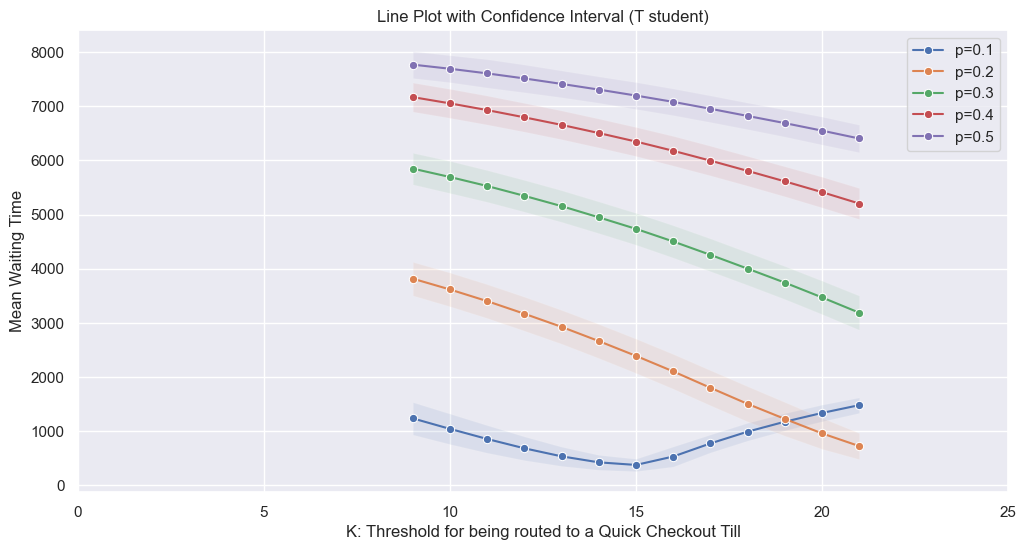

In [71]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Ma il mean delle diverse code è uguale al service time del global???
# Provare direttamente a dare tutti i valori a lineplot perché si calcola direttamente il CI
# A questo punto scartare 0.4 e 0.5 e investigare sugli altri ed aumentare K

pi = "W"

for p_ in p:

    y_W = []
    ci_lb = []
    ci_ub = []
    for k in K:
        couple = f"{p_}_{k}"
        y_W.append(PI_ME[pi][couple]["mean"].mean())
        sigma = math.sqrt((PI_ME[pi][couple]["std"]**2).sum() / C)
        # print(sigma, PI_ME[pi][couple]["mean"].std())
        ci_lb.append(PI_ME[pi][couple]["mean"].mean() - (1.833 * (sigma / math.sqrt(len(PI_ME[pi][couple]["mean"])))))
        ci_ub.append(PI_ME[pi][couple]["mean"].mean() + (1.833 * (sigma / math.sqrt(len(PI_ME[pi][couple]["mean"])))))
        # See also: https://stats.stackexchange.com/questions/12002/how-to-calculate-the-confidence-interval-of-the-mean-of-means

    # print(ci_lb, ci_ub)
    plt.fill_between(K, ci_lb, ci_ub, alpha=0.1)
    sns.lineplot(x=K, y=y_W, marker='o', label=f"p={p_}")


plt.xlim(0, 25)  # Set the x-axis limits
plt.title('Line Plot with Confidence Interval (T student)')
plt.xlabel('K: Threshold for being routed to a Quick Checkout Till')
plt.ylabel('Mean Waiting Time')

plt.legend()
plt.show()

In [10]:
K[:5]

[9, 10, 11, 12, 13]

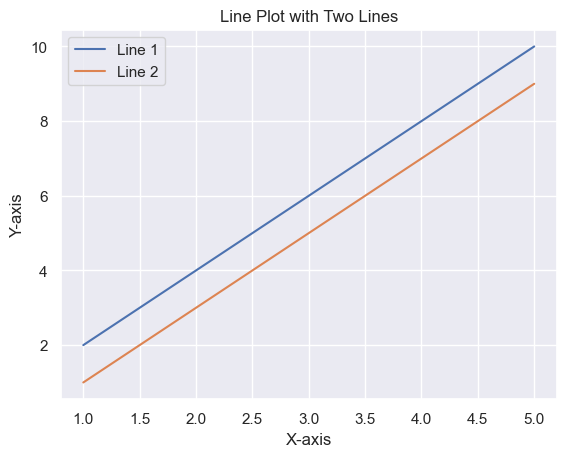

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the x-axis values
x = [1, 2, 3, 4, 5]

# Define the y-axis values for the first line
y1 = [2, 4, 6, 8, 10]

# Define the y-axis values for the second line
y2 = [1, 3, 5, 7, 9]

# Create the line plot
sns.lineplot(x=x, y=y1, label='Line 1')
sns.lineplot(x=x, y=y2, label='Line 2')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Two Lines')

# Show the plot
plt.legend()
plt.show()


In [12]:
PI_ME["W"]["0.1_10"]["mean"]

Q0       9.907743
Q1     1210.71342
Q2    1200.226344
Q3    1179.113445
Q4    1166.503588
Q5    1143.891154
Q6    1136.074089
Q7    1129.271448
Q8    1119.524053
Q9    1118.917312
dtype: object

In [13]:


# Genera tutte le combinazioni possibili dei livelli dei due fattori
combinazioni = [(a, b) for a in livelli_A for b in livelli_B]

# Valori fittizi per scopi illustrativi
valori_y = np.random.rand(len(combinazioni))

# Crea il lineplot
for i, (a, b) in enumerate(combinazioni):
    plt.plot(livelli_A, valori_y[i * len(livelli_B):(i + 1) * len(livelli_B)], label=f'B={b}')

# Aggiungi etichette e titoli
plt.xlabel('Livelli di A')
plt.ylabel('Valori di Y')
plt.title('Full Factorial Analysis')
plt.legend(title='Livello di B', loc='upper right')

# Mostra il plot
plt.show()


sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]

# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]

# Plot the line
sns.lineplot(x=x, y=y, marker='o')

# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI')

plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()







PI_T = {}

for key in PI:
    PI_T[key] = pd.DataFrame()
    PI_T[key]["Mean"] = PI[key].mean()
    # CI 95%
    PI_T[key]["CI (LB)"] = PI[key].mean() - (1.96 * (PI[key].std() / math.sqrt(n)))
    PI_T[key]["CI (UB)"] = PI[key].mean() + (1.96 * (PI[key].std() / math.sqrt(n)))


for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


# C=4 DISCRETE
# This Code uses PI_T from the above cell
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0.5
T = 40
t = 1/T
M = E_M
# K = K
# sT = sT
# alphaK = alphaK

def integrand(x):
    return (math.floor(x+0.5)*lognorm.pdf(x, s=sigma, scale=math.exp(mu)))

def integrand_2(x):
    return (((math.floor(x+0.5))**2)*lognorm.pdf(x, s=sigma, scale=math.exp(mu)))

pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = ((quad(integrand, 0, K+0.5, limit=200)[0])/alphaK)*sT
# print(S_i)
# S_i = E_M * norm.cdf(((math.log(K+0.51) - mu - sigma**2)/sigma)) / norm.cdf(((math.log(K+0.51) - mu)/sigma))
# print(S_i)
s_i = 1/S_i

Var_S_i = ((quad(integrand_2, 0, K+0.5, limit=200)[0])/alphaK)*sT**2 - S_i**2
# print("Var_i", Var_S_i, VAR_M)

rho_i = t_i/s_i
# N_i = rho_i/(1-rho_i)
N_i = rho_i + ((rho_i**2 + t_i**2 * Var_S_i)/(2*(1-rho_i)))
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i


pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = ((quad(integrand, K+0.5, np.inf, limit=200)[0])/(1-alphaK))*sT
# print(S_j)
# S_j = E_M * norm.cdf((-(math.log(K+0.50) - mu - sigma**2)/sigma)) / (1-norm.cdf(((math.log(K+0.50) - mu)/sigma)))
# print(S_j)
s_j = 1/S_j

Var_S_j = ((quad(integrand_2, K+0.5, np.inf, limit=200)[0])/(1-alphaK))*sT**2 - S_j**2
# print("Var_j", Var_S_j, VAR_M)

rho_j = t_j/s_j
# N_j = rho_j/(1-rho_j)
N_j = rho_j + ((rho_j**2 + t_j**2 * Var_S_j)/(2*(1-rho_j)))
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j


if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_i, rho_i, rho_j, rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_i, rho_i, rho_j, rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_i, S_i, S_j, S_j])
else:
    PI_T["S"]["Theoretical"] = [S_i, S_i, S_j, S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_i, NQ_i, NQ_j, NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_i, NQ_i, NQ_j, NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_i, W_i, W_j, W_j])
else:
    PI_T["W"]["Theoretical"] = [W_i, W_i, W_j, W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 4
    for i in range(4):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

print("\n")
for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")

NameError: name 'livelli_A' is not defined

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]

# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]

# Plot the line
sns.lineplot(x=x, y=y, marker='o')

# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI')

plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

#Define factors and levels
factors = {'FactorA': [1, 2, 3], 'FactorB': [0.5, 1.0]}
levels = list(product(*factors.values()))

#Generate full factorial design matrix
design_matrix = np.array(levels)

#Perform experiments and collect responses
responses = np.random.rand(len(levels))  #Replace with your actual response data

#Analyze the effects of factors
mean_responses = np.mean(responses, axis=0)

#Create interaction plots
for i, factor in enumerate(factors.keys()):
    plt.figure()
    for j, level in enumerate(factors[factor]):
        subset_responses = responses[design_matrix[:, i] == level]
        plt.plot(subset_responses, label=f'{factor}={level}')

    plt.title(f'Interaction Plot for {factor}')
    plt.xlabel('Experiment')
    plt.ylabel('Response')
    plt.legend()
    plt.show()

#Create main effects plot
for i, factor in enumerate(factors.keys()):
    main_effect = np.mean(mean_responses[design_matrix[:, i] == max(factors[factor])]) - np.mean(
        mean_responses[design_matrix[:, i] == min(factors[factor])])

    plt.bar(factor, main_effect, label=f'{factor}')

plt.title('Main Effects Plot')
plt.ylabel('Effect Size')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

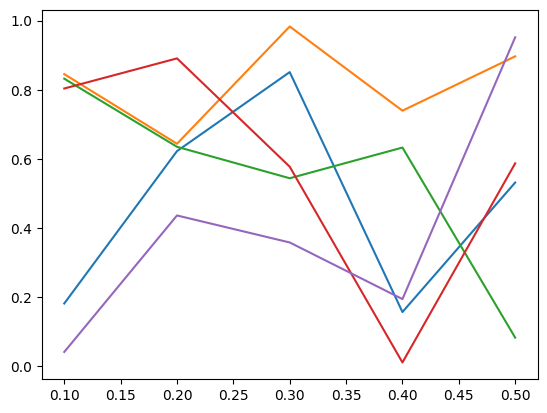

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




# Supponiamo di avere due fattori A e B con tre livelli ciascuno
livelli_A = [0.1, 0.2, 0.3, 0.4, 0.5]
livelli_B = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

# Genera tutte le combinazioni possibili dei livelli dei due fattori
combinazioni = [(a, b) for a in livelli_A for b in livelli_B]

# Valori fittizi per scopi illustrativi
valori_y = np.random.rand(len(combinazioni))

# Crea il lineplot
for i, (a, b) in enumerate(combinazioni):
    plt.plot(livelli_A, valori_y[i * len(livelli_B):(i + 1) * len(livelli_B)], label=f'B={b}')

# Aggiungi etichette e titoli
plt.xlabel('Livelli di A')
plt.ylabel('Valori di Y')
plt.title('Full Factorial Analysis')
plt.legend(title='Livello di B', loc='upper right')

# Mostra il plot
plt.show()